In [1]:
#                                          INTRODUCTION
# Hello there, this is my first "UNGUIDED" data science project and as we know we analyse and visualize data
# to answer several questions or to solve a problem 
# this time I tried answering if having highest products sales means that your store is having the highest gains
# and to do that I used a small dataset of purchases from several store on the day of 1st januray 2012


In [2]:
# IMPORTING LIBRARIES 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# IMPORTING OUR CSV FILE

df = pd.read_csv('Purchase.txt')
df.head()

,Number,Date,Hour,Store,Sales,Total,Card
0,1,2012-01-01,09:00,San Jose,Men's Clothing,214.05,Amex
1,2,2012-01-01,09:00,Fort Worth,Women's Clothing,153.57,Visa
2,3,2012-01-01,09:00,San Diego,Music,66.08,Cash
3,4,2012-01-01,09:00,Pittsburgh,Pet Supplies,493.51,Discover
4,5,2012-01-01,09:00,Omaha,Children's Clothing,235.63,MasterCard


In [4]:
# First we clean the data we are going to use
# To do that first we check for null and check the type of each column

print(df.isnull().sum())
df.dtypes


Number    0
Date      0
Hour      0
Store     0
Sales     0
Total     0
Card      0
dtype: int64


Number      int64
Date       object
Hour       object
Store      object
Sales      object
Total     float64
Card       object
dtype: object

In [5]:
# Drop the unneeded columns
df_dropnb = df.drop(['Number'],axis=1)
df_dropnb

,Date,Hour,Store,Sales,Total,Card
0,2012-01-01,09:00,San Jose,Men's Clothing,214.05,Amex
1,2012-01-01,09:00,Fort Worth,Women's Clothing,153.57,Visa
2,2012-01-01,09:00,San Diego,Music,66.08,Cash
3,2012-01-01,09:00,Pittsburgh,Pet Supplies,493.51,Discover
4,2012-01-01,09:00,Omaha,Children's Clothing,235.63,MasterCard
...,...,...,...,...,...,...
11335,2012-01-01,17:59,Miami,Garden,370.44,MasterCard
11336,2012-01-01,17:59,Durham,Baby,63.54,Discover
11337,2012-01-01,17:59,Cincinnati,Men's Clothing,105.28,Cash
11338,2012-01-01,17:59,Columbus,Computers,310.81,Cash


#### Everything seems perfectly fine 

In [6]:
# Then we group the data with the columns we need and take the first 10
# So we can focus on the stores with the highest gains

df_sum =df_dropnb.groupby('Store').sum().sort_values('Total',ascending=False).head(10)
df_sum

,Total
Store,
Scottsdale,33646.81
Greensboro,33101.63
Fresno,33040.41
Mesa,32680.36
Santa Ana,32359.15
Oakland,32320.61
Omaha,32032.66
Aurora,31865.55
Lubbock,31201.77


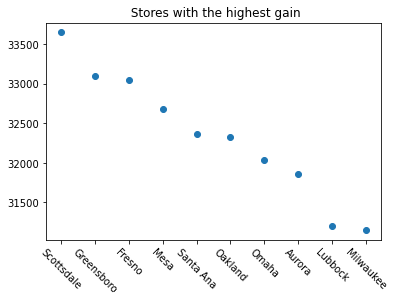

In [15]:
# We plot the result we got in a scatter plot

df_sum_array= df_sum.to_numpy()
data = [index for index in df_sum.index]

df_sum_array = df_sum_array.flatten()

plt.xticks( rotation=-45)
plt.title(" Stores with the highest gain")
plt.scatter(data,df_sum_array)
plt.show()

In [8]:
# After checking the stores with the highest gains now we see the stores with the highest sales in that day 

df_count =df_dropnb[["Store","Sales"]].groupby('Store').count().sort_values('Sales',ascending=False).head(10)
df_count

,Sales
Store,
Jacksonville,134
Scottsdale,134
Mesa,132
St. Louis,131
Fresno,130
Las Vegas,125
Milwaukee,123
Virginia Beach,122
Greensboro,122


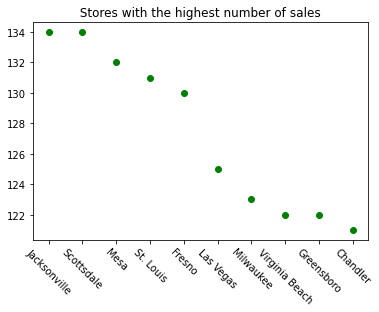

In [14]:
# We plot the result that we got

df_count_array = df_count.to_numpy()
df_count_data = [index for index in df_count.index]

df_count_array = df_count_array.flatten()

plt.xticks( rotation=-45)
plt.title(" Stores with the highest number of sales ")
plt.scatter(df_count_data,df_count_array,color='green')
plt.show()

In [10]:
# After checking both data, now we need to answer our question 
# by joining both dataframe with an inner join 

df_compare = pd.concat([df_sum, df_count], axis=1, join="inner")
df_compare

,Total,Sales
Store,,
Scottsdale,33646.81,134
Greensboro,33101.63,122
Fresno,33040.41,130
Mesa,32680.36,132
Milwaukee,31151.60,123


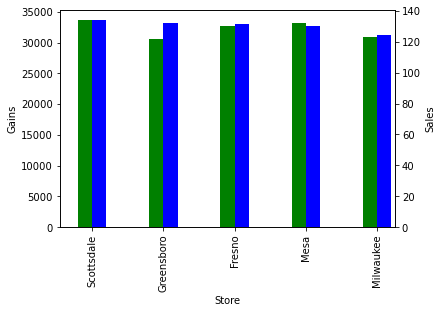

<Figure size 360x360 with 0 Axes>

In [11]:
# Now, again, we plot the result we got 

df_sum.reset_index(drop=True)
df_count.reset_index(drop=True)
fig = plt.figure()
df_count
df_sum
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ax1.set_ylabel('Gains')
ax2.set_ylabel('Sales')


width=0.2

df_compare['Total'].plot(kind='bar',color='blue',ax=ax1,width=width,position=0)
df_compare['Sales'].plot(kind='bar',color='green',ax=ax2,width=width,position=1)
plt.figure(figsize=(5, 5))
plt.show()

In [12]:
# After inner joining both dataframes
# now we outer joing them to check the relation between their Gains and their Sales

df_compare_outer = pd.concat([df_sum, df_count], axis=1, join="outer")
df_compare_outer

,Total,Sales
Store,,
Scottsdale,33646.81,134.0
Greensboro,33101.63,122.0
Fresno,33040.41,130.0
Mesa,32680.36,132.0
Santa Ana,32359.15,NaN
Oakland,32320.61,NaN
Omaha,32032.66,NaN
Aurora,31865.55,NaN
Lubbock,31201.77,NaN


In [13]:
# As we see we have some missing data since not all of stores have both highest sales and gains in a day